<a href="https://colab.research.google.com/github/asim5800/azure/blob/main/BL_APP_REVIEWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google_play_scraper import app, Sort, reviews_all

# Top apps for our rivalry

1 Phone pe (com.phonepe.app)

2 Google pay (com.google.android.apps.nbu.paisa.user)

3 PayTM (net.one97.paytm)

4 Mobikwik (com.mobikwik_new)

5 PhonPe business(com.phonepe.app.business)

6 BharatPe (com.bharatpe.app)
 

In [3]:
# Define and configure Google Play Scraper library
phonepe_users_reviews = reviews_all(
    'com.bhartloan.personalloan',
    sleep_milliseconds=0,
    #lang='chi', # Default language is 'en', set language to Chinese.
    #country='hk', # Default country is 'us', set country to Hong Kong.
    count=100000, # defaults to 100
    sort=Sort.MOST_RELEVANT, # Default is Sort.MOST_RELEVANT.
)

In [4]:
# Convert collected reviews data into dataframe
df_reviews = pd.DataFrame(np.array(phonepe_users_reviews),columns=['review'])
df_reviews = df_reviews.join(pd.DataFrame(df_reviews.pop('review').tolist()))
# Display dataframe header
df_reviews.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,dfe2356c-3f5f-43b4-9053-7ff4f8980496,Sheth Keyur,https://play-lh.googleusercontent.com/a/AGNmyx...,"At first, I thought it's a Chinese app, but af...",5,38,1.0.3,2023-03-24 10:02:55,None,None,1.0.3
1,f503c740-29bb-4485-95b5-1b7c0c0a25ca,Ramesh Karunakaran,https://play-lh.googleusercontent.com/a-/ACB-R...,I was in need of a bigger amount for an extrem...,5,25,1.0.3,2023-03-11 10:30:26,None,None,1.0.3
2,07411b0d-db33-4c15-9acc-ecea6072d064,SAJID BANGI,https://play-lh.googleusercontent.com/a-/ACB-R...,Really an amazing experience with bharat loan ...,5,2,1.0.4,2023-04-21 12:13:53,None,None,1.0.4
3,05d94d0c-d467-4bf7-bd5f-dddf51078e32,Hari Kannan,https://play-lh.googleusercontent.com/a-/ACB-R...,"First i thought it was scam, but after that mr...",5,5,1.0.4,2023-04-20 07:25:47,None,None,1.0.4
4,0389788d-c87b-41ac-919d-a186cadfbdea,Abhishek Sena,https://play-lh.googleusercontent.com/a/AGNmyx...,Really an amazing experience with bharat loan ...,5,0,1.0.3,2023-04-08 13:35:25,None,None,1.0.3


In [5]:
# Check dataframe information
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              557 non-null    object        
 1   userName              557 non-null    object        
 2   userImage             557 non-null    object        
 3   content               557 non-null    object        
 4   score                 557 non-null    int64         
 5   thumbsUpCount         557 non-null    int64         
 6   reviewCreatedVersion  397 non-null    object        
 7   at                    557 non-null    datetime64[ns]
 8   replyContent          0 non-null      object        
 9   repliedAt             0 non-null      object        
 10  appVersion            397 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 48.0+ KB


In [6]:
#df_reviews.to_csv('12club_review.csv')

In [7]:
# Count number of review scores
df_reviews['score'].value_counts()

5    393
1    127
4     29
2      5
3      3
Name: score, dtype: int64

<Axes: ylabel='score'>

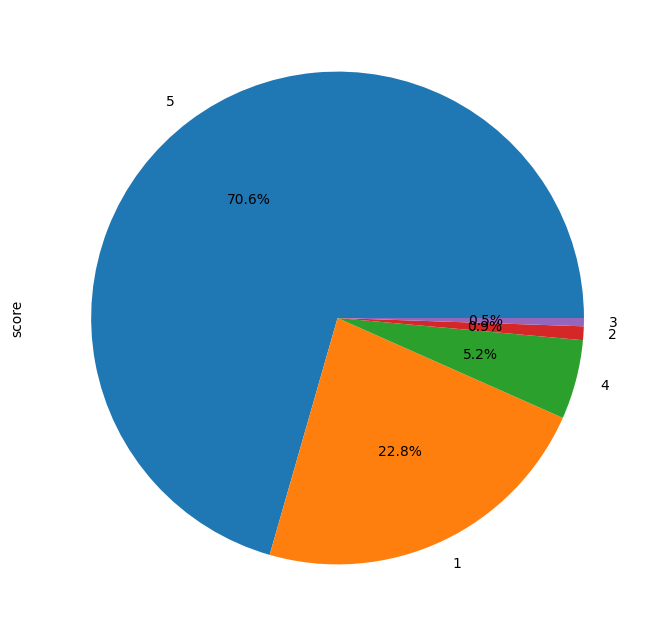

In [8]:
# Visualize review scores as pie chart  
df_reviews['score'].value_counts().plot(kind='pie',figsize=(8,8), autopct='%1.1f%%')

In [9]:
# Create new dataframe with review content and score for further analysis
df_reviews_content = pd.DataFrame(df_reviews, columns=['content','score'])

In [10]:
# Display new dataframe header
df_reviews_content.head()

,content,score
0,"At first, I thought it's a Chinese app, but af...",5
1,I was in need of a bigger amount for an extrem...,5
2,Really an amazing experience with bharat loan ...,5
3,"First i thought it was scam, but after that mr...",5
4,Really an amazing experience with bharat loan ...,5


Install azure text analytics API

In [11]:
pip install azure-ai-textanalytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.9/173.9 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 5.8 MB/s eta 0:00:00


In [12]:
# Import necessary libraries
from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential

In [13]:
# Define the service key and endpoint of Azure Text Analytics
key = "4f40f49470f34ce2b1758902d75c182c"
endpoint = "https://mycognitiveserviceresource12345.cognitiveservices.azure.com/"

In [14]:
# Configure Azure Text Analytics client library
ta_credential = AzureKeyCredential(key)
text_analytics_client = TextAnalyticsClient(
        endpoint=endpoint, 
        credential=ta_credential)
client = text_analytics_client

reviews_content_sentiment = []

# Pass review content to Azure Text Analytics and collect sentiment result
for index, headers in df_reviews_content.iterrows():
    reviews_content = str(headers['content'])
    print("Review Content: {}".format(reviews_content))
    documents = [reviews_content]
    response = client.analyze_sentiment(documents=documents, language="zh-hant")[0]
    sentiment = response.sentiment
    print("Review Content Sentiment: {}".format(sentiment))
    reviews_score = str(headers['score'])
    print("Review Content Score: {}".format(reviews_score))
    reviews_content_sentiment.append([reviews_content, sentiment, reviews_score])

# Convert collected news headers with sentiment to Pandas dataframes.
reviews_content_sentiment = pd.DataFrame(reviews_content_sentiment, columns=['content','sentiment','reviews_score'])

Review Content: At first, I thought it's a Chinese app, but after interacting with Uma Chhibber, I was pretty sure that she will definitely help me out in my hard time. And she did the same. A very Supportive, Polite and up to the mark support was provided by her. I would recommend everyone to use this app. Keep up the good work UMA. KEEP ROCKING AND KEEP Shining..!
Review Content Sentiment: positive
Review Content Score: 5
Review Content: I was in need of a bigger amount for an extremely urgent need and none of my friends could spare money in short notice. I came to know about Bharat Loan and applied. The executive named Divya Yadav connected with me and explained me the terms. She has taken the required documents and processed it so fast. Everything is digital and I received funds within hours. Overall experiece is very good. But remember interest rates are bit high and this is only, when you are in real urgency.
Review Content Sentiment: mixed
Review Content Score: 5
Review Content:

In [15]:
# Count number of review content sentiment
reviews_content_sentiment['sentiment'].value_counts()

positive    401
negative    116
neutral      21
mixed        19
Name: sentiment, dtype: int64

<Axes: ylabel='content'>

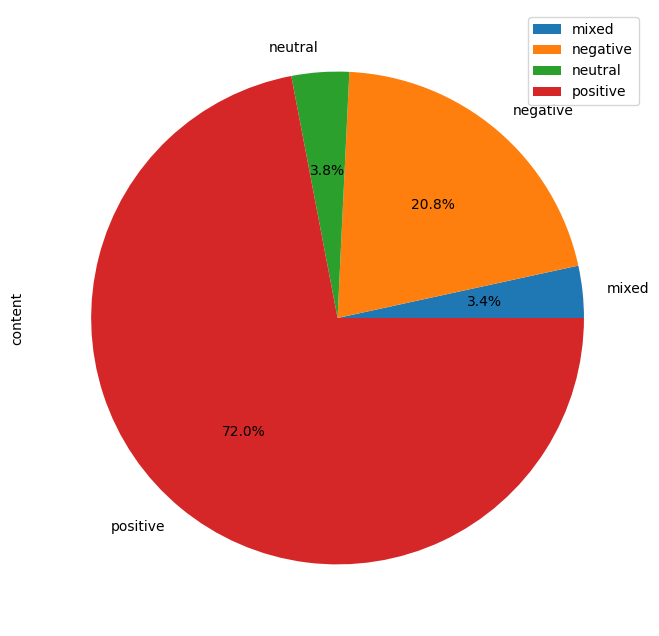

In [16]:
# Visualize review content sentiment as pie chart.
reviews_content_sentiment.groupby(['sentiment']).count().plot(kind='pie', y='content', figsize=(8,8), autopct='%1.1f%%')

In [17]:
# Group by sentiment & reviews_score
reviews_content_sentiment.groupby(["sentiment", "reviews_score"])["content"].count()

sentiment  reviews_score
mixed      1                  3
           3                  1
           4                  2
           5                 13
negative   1                103
           2                  5
           3                  2
           5                  6
neutral    1                 15
           4                  1
           5                  5
positive   1                  6
           4                 26
           5                369
Name: content, dtype: int64

<Axes: xlabel='sentiment'>

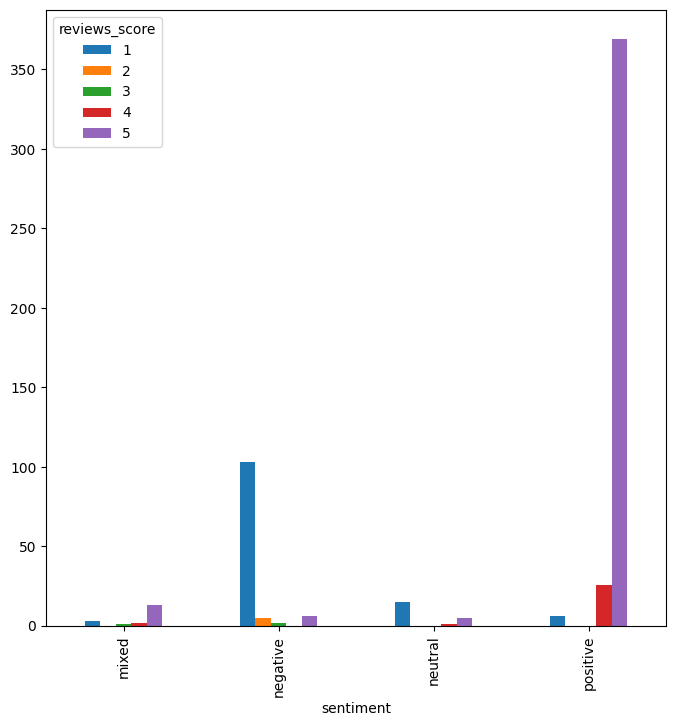

In [18]:
# Visual sentiment & reviews_score as bar chart
pd.crosstab(reviews_content_sentiment['sentiment'],reviews_content_sentiment['reviews_score']).plot.bar(figsize=(8,8))

In [19]:
# Check dataframe information
reviews_content_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        557 non-null    object
 1   sentiment      557 non-null    object
 2   reviews_score  557 non-null    object
dtypes: object(3)
memory usage: 13.2+ KB


In [20]:
# Create new dataframe to perform factorization
reviews_content_sentiment_factorized = reviews_content_sentiment.copy()

In [21]:
# Perform factorization for sentiment column
reviews_content_sentiment_factorized.sentiment = pd.factorize(reviews_content_sentiment_factorized.sentiment)[0]

In [22]:
# Convert reviews_score column data type to intager
reviews_content_sentiment_factorized['reviews_score'] = reviews_content_sentiment_factorized['reviews_score'].astype(int)

In [23]:
# Check dataframe information
reviews_content_sentiment_factorized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        557 non-null    object
 1   sentiment      557 non-null    int64 
 2   reviews_score  557 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 13.2+ KB


In [24]:
# Group by sentiment (factorized) & reviews_score
reviews_content_sentiment_factorized.groupby(["sentiment", "reviews_score"])["content"].count()

sentiment  reviews_score
0          1                  6
           4                 26
           5                369
1          1                  3
           3                  1
           4                  2
           5                 13
2          1                103
           2                  5
           3                  2
           5                  6
3          1                 15
           4                  1
           5                  5
Name: content, dtype: int64

After factorization of sentiment column, below is numberic values the mapping.

0 = Neutral
1 = Negative
2 = Positive
3 = Mixed

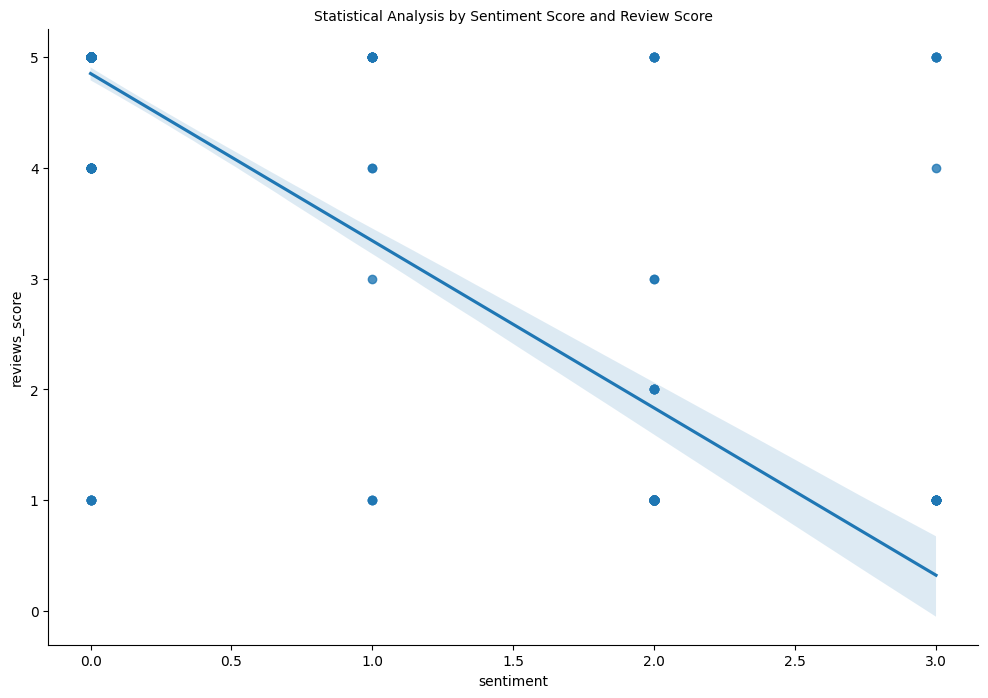

In [25]:
# Plotting sentiment & reviews_score columns relationship by Seaborn.
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
plt.title('Statistical Analysis by Sentiment Score and Review Score', fontsize=10)
sns.regplot(x='sentiment', y= 'reviews_score', data=reviews_content_sentiment_factorized)
sns.despine()

Data Analysis from Visualization

Positive sentiment (2) from review content is trending to higher reivew score.

Negative sentiment (1) from review content is trending to lower review score.

Neutral sentiment (0) from review content is trending to lower review score.

In other word, lower review score is trending to Neutral sentiment (0).

From this observation, if sentiment is negative to neutral, user would give lower review score.